In [1]:
# Begin Python file by importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Set up variable to read in CSV file
data = pd.read_csv('2022_Closed_Business_Journal_CLEANSED.csv')

In [3]:
# Make sure columns have been imported and are all listed
data.columns

Index(['OFFICE', 'PROPERTY_ADDRESS', 'CITY', 'STATE', 'ZIP_POSTAL_CODE',
       'ACTUAL_CLOSE_DATE', 'SALES_ID'],
      dtype='object')

In [4]:
# Preview data by showing first and last 5 records
data.describe

<bound method NDFrame.describe of       OFFICE           PROPERTY_ADDRESS           CITY STATE  ZIP_POSTAL_CODE  \
0          4         1305 Elkhorn Drive      Arlington    NE            68002   
1          1  Lot 3 River Ridge Estates      Arlington    NE            68002   
2          1      105 North 13th Street        Ashland    NE            68003   
3          1      105 North 13th Street        Ashland    NE            68003   
4          5           1244 W Ridge Way        Ashland    NE            68003   
...      ...                        ...            ...   ...              ...   
3135       4             302 W P Street  Weeping Water    NE            68463   
3136       1   608 and 610 E Eldora Ave  Weeping Water    NE            68463   
3137       3      1590 Provencal Street          Yutan    NE            68073   
3138       4             203 Otoe Drive          Yutan    NE            68073   
3139       4             406 Elm Street          Yutan    NE            680

In [5]:
# Verify that no null values exist within any attribute of any record (by column)
data.isnull().any()

OFFICE               False
PROPERTY_ADDRESS     False
CITY                 False
STATE                False
ZIP_POSTAL_CODE      False
ACTUAL_CLOSE_DATE    False
SALES_ID             False
dtype: bool

In [6]:
# Verify data types of attribute
data.OFFICE.head()

0    4
1    1
2    1
3    1
4    5
Name: OFFICE, dtype: int64

In [7]:
data.ZIP_POSTAL_CODE.head()

0    68002
1    68002
2    68003
3    68003
4    68003
Name: ZIP_POSTAL_CODE, dtype: int64

In [8]:
data.SALES_ID.head()

0    262
1     74
2    223
3     97
4    322
Name: SALES_ID, dtype: int64

<AxesSubplot: >

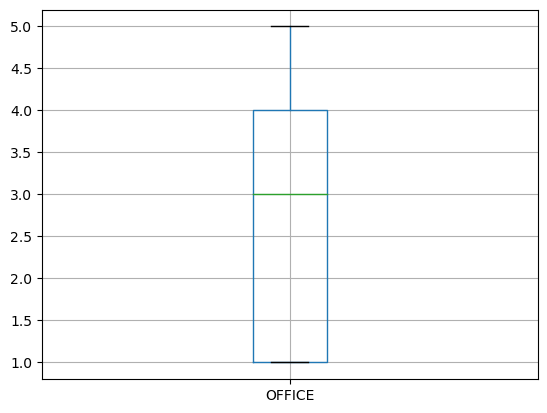

In [9]:
# Create visualizations to observe data
data.boxplot('OFFICE')

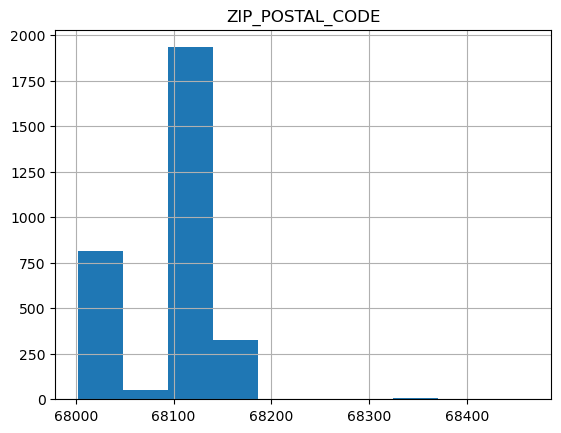

In [10]:
data.hist('ZIP_POSTAL_CODE')
plt.show()

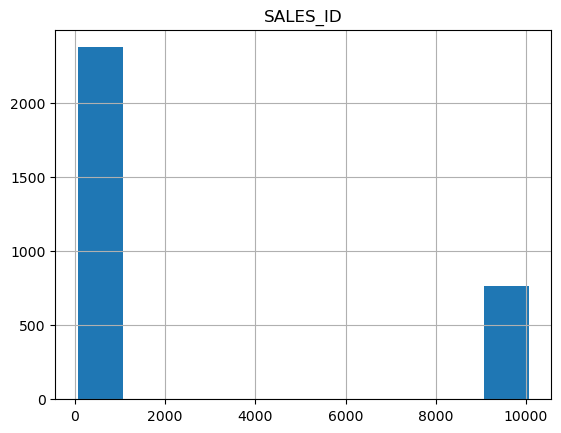

In [11]:
data.hist('SALES_ID')
plt.show()

In [12]:
# Look at numeric attributes
data.describe()

,OFFICE,ZIP_POSTAL_CODE,SALES_ID
count,3140.000000,3140.000000,3140.000000
mean,2.745860,68099.769108,2647.424841
std,1.604112,51.087004,4184.690819
min,1.000000,68002.000000,64.000000
25%,1.000000,68048.000000,232.000000
50%,3.000000,68116.000000,333.000000
75%,4.000000,68133.000000,554.000000
max,5.000000,68463.000000,10061.000000


array([[<AxesSubplot: title={'center': 'OFFICE'}>]], dtype=object)

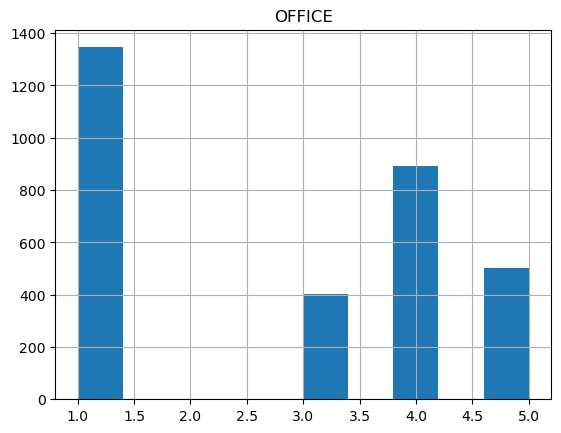

In [16]:
data.hist('OFFICE')

In [17]:
data[['OFFICE', 'SALES_ID', 'ZIP_POSTAL_CODE']].corr()

,OFFICE,SALES_ID,ZIP_POSTAL_CODE
OFFICE,1.000000,-0.210751,-0.08736
SALES_ID,-0.210751,1.000000,0.09596
ZIP_POSTAL_CODE,-0.087360,0.095960,1.00000


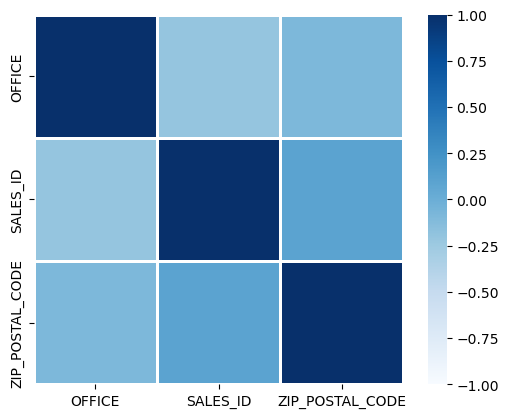

In [21]:
corr = data[['OFFICE', 'SALES_ID', 'ZIP_POSTAL_CODE']].corr()

ax1 = sns.heatmap(corr, cbar={'label': 'colorbar title'}, linewidths=2,vmax=1, vmin=-1, square=True, cmap='Blues')
plt.show()

In [23]:
data_cat = data[['OFFICE', 'SALES_ID', 'ZIP_POSTAL_CODE', 'CITY']]

Bar Graph for OFFICE: Total = 4


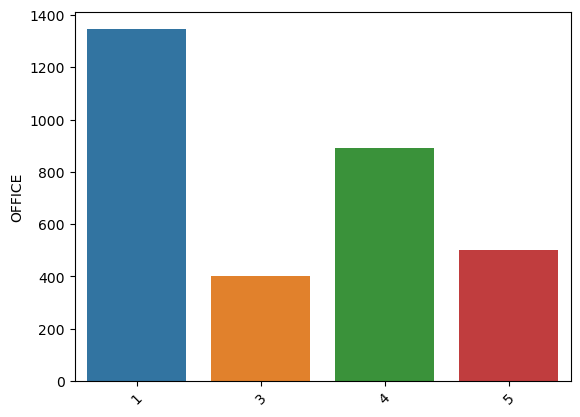

Bar Graph for SALES_ID: Total = 217


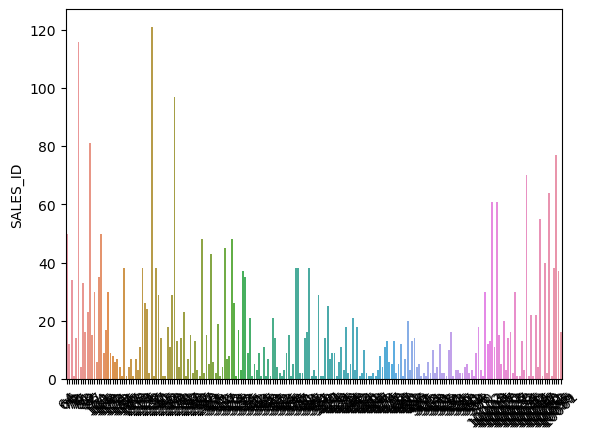

Bar Graph for ZIP_POSTAL_CODE: Total = 59


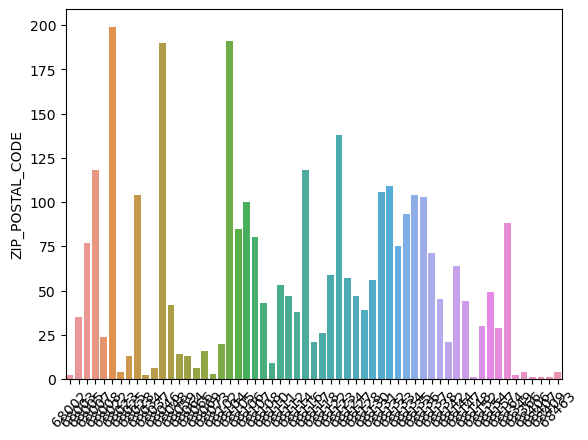

Bar Graph for CITY: Total = 30


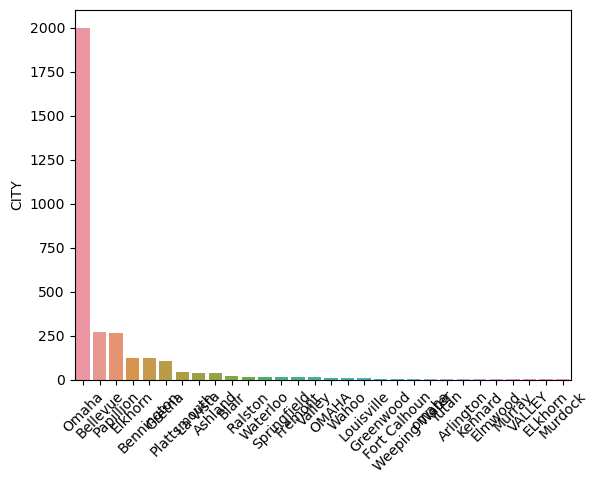

In [33]:
for i in data_cat.columns:
    cat_num = data_cat[i].value_counts()
    print("Bar Graph for %s: Total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.show()

graph for ZIP_POSTAL_CODE: total = 20


C:\Users\edena\AppData\Local\Temp\ipykernel_24188\3129717311.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cat_num = data_cat[i].value_counts()[:20]


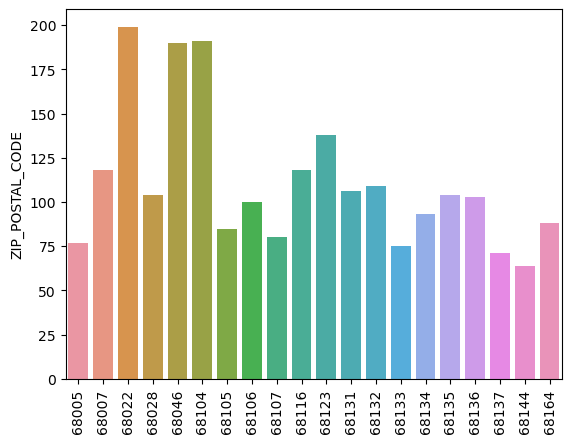

graph for SALES_ID: total = 20


C:\Users\edena\AppData\Local\Temp\ipykernel_24188\3129717311.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  cat_num = data_cat[i].value_counts()[:20]


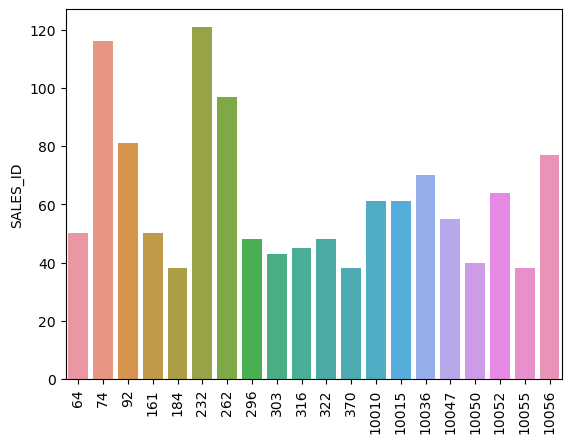

In [27]:
for i in data_cat[['ZIP_POSTAL_CODE','SALES_ID']].columns:
    cat_num = data_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [34]:
pd.pivot_table(data, index = 'OFFICE', values = 'ZIP_POSTAL_CODE')

,ZIP_POSTAL_CODE
OFFICE,
1,68103.224368
3,68111.319202
4,68093.721973
5,68092.007984


In [35]:
pd.pivot_table(data, index = 'SALES_ID', values = 'ZIP_POSTAL_CODE')

,ZIP_POSTAL_CODE
SALES_ID,
64,68084.880000
66,68078.583333
70,68123.558824
72,68025.000000
73,68101.142857
...,...
10053,68136.000000
10055,68106.789474
10056,68100.129870


In [37]:
pd.pivot_table(data, index = 'ZIP_POSTAL_CODE', values = 'OFFICE', aggfunc='count')

,OFFICE
ZIP_POSTAL_CODE,
68002,2
68003,35
68005,77
68007,118
68008,24
68022,199
68023,4
68025,13
68028,104


In [38]:
pd.pivot_table(data, index = 'OFFICE', values = 'SALES_ID', aggfunc='count')

,SALES_ID
OFFICE,
1,1346
3,401
4,892
5,501


In [41]:
pd.pivot_table(data, index = ['OFFICE','SALES_ID'], values = 'ZIP_POSTAL_CODE', aggfunc='count')

ZIP_POSTAL_CODE
OFFICE SALES_ID                 
1      64                      3
       66                     12
       70                      6
       73                      6
       74                     19
...                          ...
5      10002                  20
       10008                   1
       10015                   2
       10028                   2
       10059                   1

[393 rows x 1 columns]

(68000.0, 68200.0)

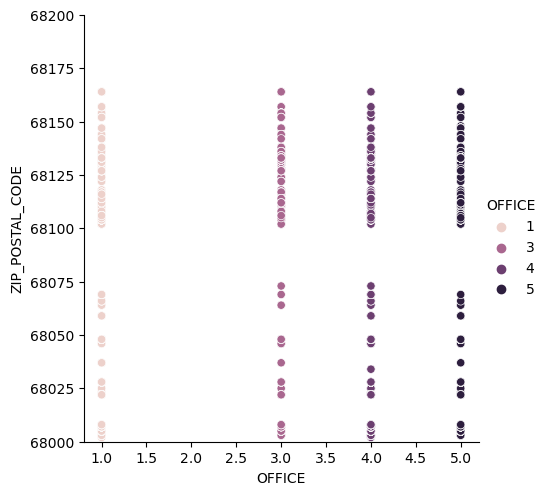

In [50]:
sns.relplot(x='OFFICE', y='ZIP_POSTAL_CODE', hue='OFFICE', data=data)
plt.ylim(68000, 68200)

(0.0, 500.0)

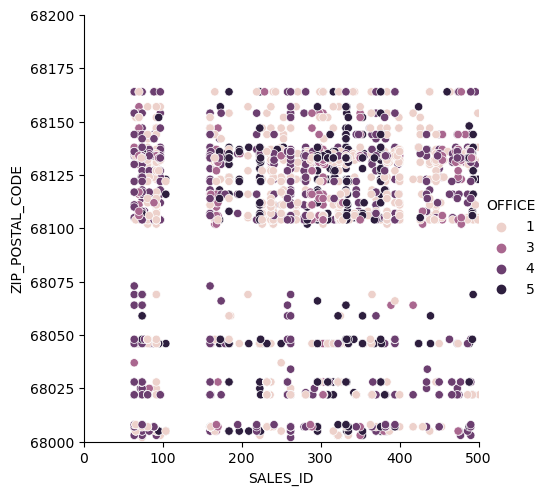

In [52]:
sns.relplot(x='SALES_ID', y='ZIP_POSTAL_CODE', hue='OFFICE', data=data)
plt.ylim(68000, 68200)
plt.xlim(0, 500)

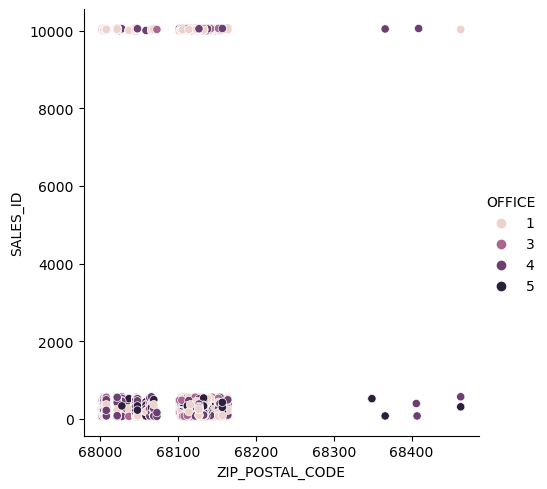

In [49]:
sns.relplot(x='ZIP_POSTAL_CODE', y='SALES_ID', hue='OFFICE', data=data)